<a href="https://colab.research.google.com/github/asifshigri12/EDA-analysis-in-Pandas/blob/main/EDA_palmer_penguin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import warnings

# New Section

In [3]:
df=pd.read_csv('/content/penguins_size (1).csv')

In [4]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
df.tail()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE


In [6]:
df.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

Summarizing data Features

Species (Categorical):

    The species of the penguin, which can be one of three types: Adelie, Chinstrap, or Gentoo.
Island (Categorical):

    The island where the penguins were observed. The dataset includes three islands: Torgersen, Biscoe, and Dream.
Culmen Length (Numerical):

    The length of the dorsal ridge of the upper mandible (bill) of the penguin.
Culmen Depth (Numerical):

    The depth or thickness of the upper mandible (bill) of the penguin.
Flipper Length (Numerical):

    The length of the flipper (wing) of the penguin.
Body Mass (Numerical):

    The body mass (weight) of the penguin.
Sex (Categorical):

    The gender of the penguin, which can be male or female.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


There are a few missing values in the data.
1. Deleting all Numeric Missing values (Less in number)
2. Imputing Categorical data haiving missing values with "most frequent"

In [8]:
df.shape

(344, 7)

In [9]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [10]:
#getting the sum of missing values
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [11]:
#dropping the dropna drops null values from numeric columns
df1=df.dropna(subset=['culmen_length_mm','culmen_depth_mm',
                  'flipper_length_mm','body_mass_g'])

In [12]:
df1.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  8
dtype: int64

In [16]:
#using scikit learns simple imputer to replace values , can also use fillna
df1['sex'].fillna('MALE',inplace=True) #inplace = true fills on tjat point


<ipython-input-16-0e30865cf3f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['sex'].fillna('MALE',inplace=True) #inplace = true fills on tjat point


In [17]:
df1.loc['sex']=df_imp

NameError: name 'df_imp' is not defined

In [18]:
df1.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [20]:
# Lets count the number of penguins in each specie
specie_count=df1['species'].value_counts()
specie_count

species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

In [21]:
culmen_len=df1['culmen_length_mm'].to_numpy()
culmen_dep=df1['culmen_depth_mm'].to_numpy()

In [22]:
grouped_data = df1.groupby('species')['culmen_length_mm'].apply(list) #.apply(list) grouping list
grouped_data

species
Adelie       [39.1, 39.5, 40.3, 36.7, 39.3, 38.9, 39.2, 34....
Chinstrap    [46.5, 50.0, 51.3, 45.4, 52.7, 45.2, 46.1, 51....
Gentoo       [46.1, 50.0, 48.7, 50.0, 47.6, 46.5, 45.4, 46....
Name: culmen_length_mm, dtype: object

In [23]:
body_mass=df1['body_mass_g'].to_numpy()

In [24]:
colors=['#6495ED','#90EE90','#FBCEB1']

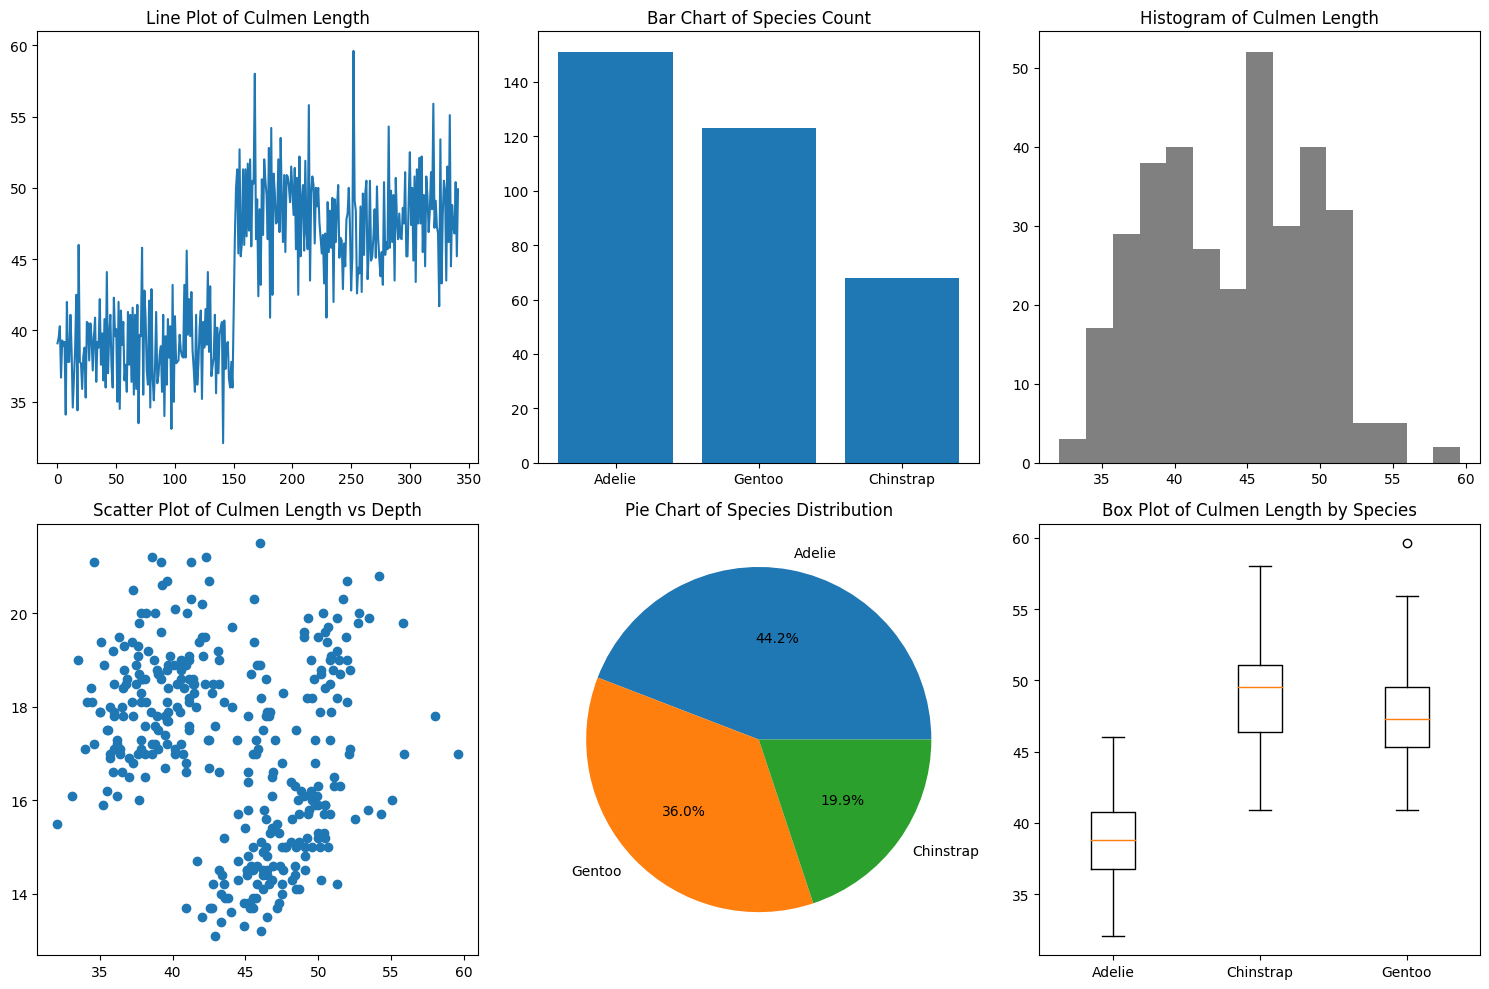

In [27]:
# Create the figure and subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Line Plot of Culmen Length #.plot create simple line plot
axs[0, 0].plot(culmen_len)
axs[0, 0].set_title('Line Plot of Culmen Length') #.set_titlefor  title of plot

# Bar Chart of Species Counts. Bar plot is used for categorical data
axs[0, 1].bar(specie_count.index, specie_count)
axs[0, 1].set_title('Bar Chart of Species Count')

# Histogram of Culmen Length. Hist  is used for data bin and give values in y axis, distribution of data
axs[0, 2].hist(culmen_len, bins=15, color='gray')
axs[0, 2].set_title('Histogram of Culmen Length')

# Scatter Plot of Culmen Length vs Depth. Relational plot, gives relation among two variables
axs[1, 0].scatter(culmen_len, culmen_dep)
axs[1, 0].set_title('Scatter Plot of Culmen Length vs Depth')

# Pie Chart of Species Distribution. percentage shares  by pie area
axs[1, 1].pie(specie_count, labels=specie_count.index, autopct='%1.1f%%')
axs[1, 1].set_title('Pie Chart of Species Distribution')

# Box Plot of Culmen Length by Species.used to identify outlier
# Preparing data for the box plot
species_grouped = df1.groupby('species')['culmen_length_mm'].apply(list)
axs[1, 2].boxplot(species_grouped, labels=species_grouped.index)
axs[1, 2].set_title('Box Plot of Culmen Length by Species')

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()


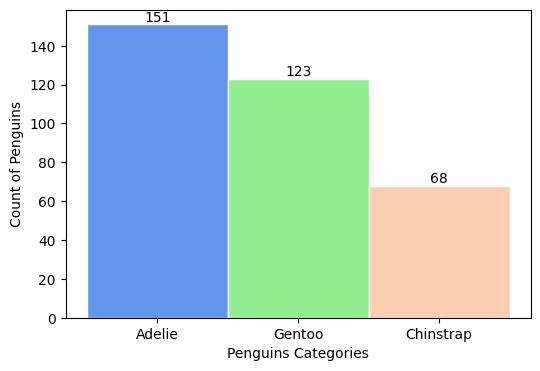

In [29]:
fig,ax=plt.subplots(figsize=(6,4))
p=ax.bar(specie_count.index,specie_count.values,width=1,edgecolor='white',color=colors)
ax.set_ylabel('Count of Penguins') #title
ax.set_xlabel('Penguins Categories') #title
ax.bar_label(p) #label  values
plt.show()

Adelie Penguins are most common in the dataset , followed by Gentoo and Chinstrap. INTERESTING!!

In [31]:
island_count=df1['island'].value_counts()
island_count

island
Biscoe       167
Dream        124
Torgersen     51
Name: count, dtype: int64

Lets see Count of Penguins per island

In [32]:
def bar_plot(x,y,y_label):
    fig,ax=plt.subplots(figsize=(6,4))
    p=ax.bar(x,y,width=1,edgecolor='white')
    ax.set_ylabel(y_label)
    ax.bar_label(p)
    plt.show()

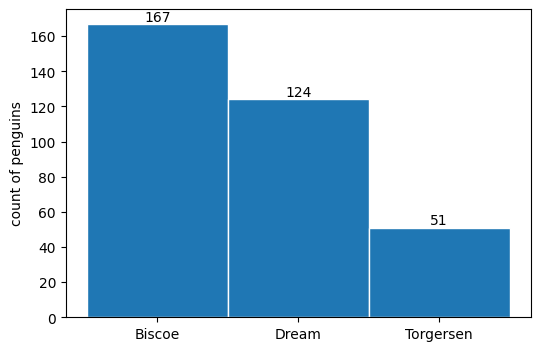

In [33]:
bar_plot(island_count.index,island_count.values,'count of penguins')

The bar plot shows Biscoe island has highest number of penguins followed by Dream and Torgersen

In [36]:
sex_count=df1['sex'].value_counts()
sex_count

sex
MALE      176
FEMALE    165
.           1
Name: count, dtype: int64

In [ ]:
#dvsvnkdsj

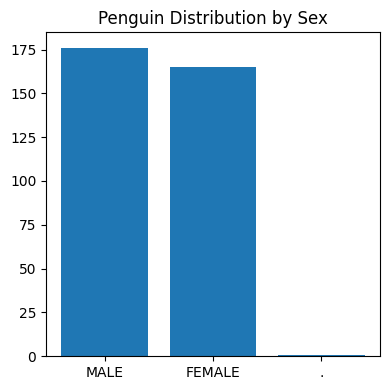

In [37]:
fig,ax=plt.subplots(figsize=(4,4))
ax.bar(sex_count.index,sex_count.values)
plt.title('Penguin Distribution by Sex')
plt.tight_layout()
plt.show()


In the palmer dataset of penguins male populace is slighly karger in number as compared to female populace

Lets check distribution of species categorized by islands

In [39]:
species_per_island=df1.groupby(['island','species']).size()
species_per_island

island     species  
Biscoe     Adelie        44
           Gentoo       123
Dream      Adelie        56
           Chinstrap     68
Torgersen  Adelie        51
dtype: int64

In [40]:
species_per_island

island     species  
Biscoe     Adelie        44
           Gentoo       123
Dream      Adelie        56
           Chinstrap     68
Torgersen  Adelie        51
dtype: int64

Now these are some interesting insights. In Biscoe island we have Adelie and Gentoo but mainly Gentoo
In Dream island we have Chinstrap and Adelie almost Equally distributed
In Torgersen island we have onlu Adelie

Now lets See Gender Disribution by island

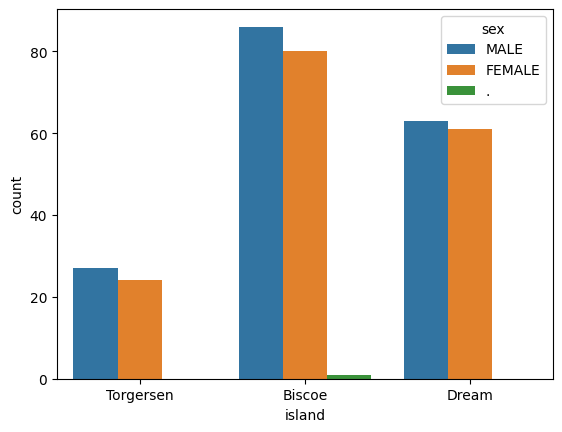

In [43]:
import seaborn as sns
import pandas as pd

sns.countplot(x='island',hue='sex',data=df1) #x island count, hue different
plt.show()

It seems all Genders all fairly distributed amongst islands

In [44]:
corr_data=df1.corr(numeric_only=True)
corr_data

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


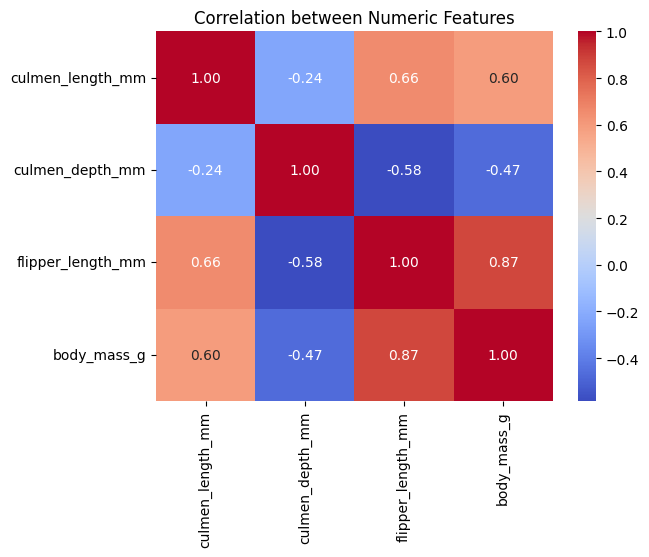

In [45]:
sns.heatmap(corr_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Numeric Features')
plt.show()


<Figure size 400x400 with 0 Axes>

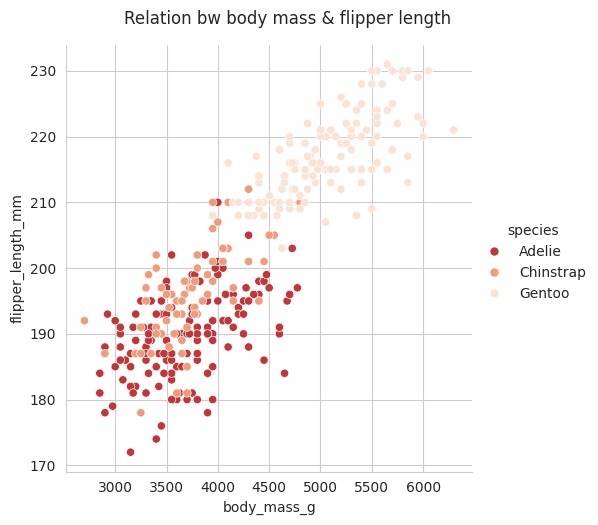

In [46]:
fig=plt.figure(figsize=(4,4))
sns.set_palette('RdBu')
sns.set_style('whitegrid')
g=sns.relplot(data=df1,kind='scatter',x='body_mass_g',y='flipper_length_mm',hue='species')
g.fig.suptitle('Relation bw body mass & flipper length',y=1.04)
plt.show()

This is another Fascinating insight. body mass and flipper length have a great degree of positive correlation

In [47]:
df1

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


<Figure size 400x400 with 0 Axes>

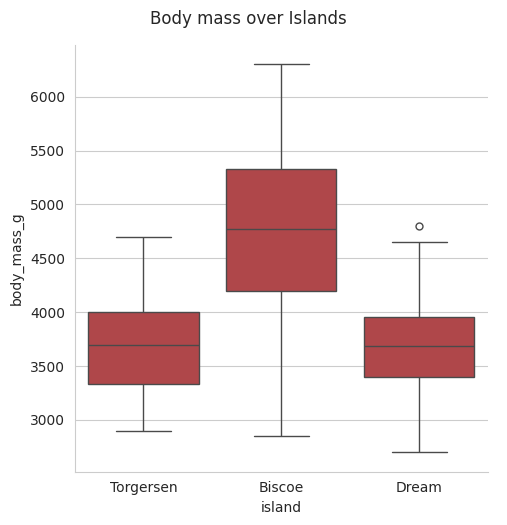

In [48]:
fig=plt.figure(figsize=(4,4))
sns.set_palette('RdBu')
sns.set_style('whitegrid')
g=sns.catplot(data=df1,kind='box',x='island',y='body_mass_g')
g.fig.suptitle('Body mass over Islands',y=1.04)
warnings.filterwarnings("ignore", category=UserWarning)
plt.show()

This is another interesting insight!! Biscoe island has the highest mean body mass amongst the islands. Lets see which species are found in biscoe

<Figure size 400x400 with 0 Axes>

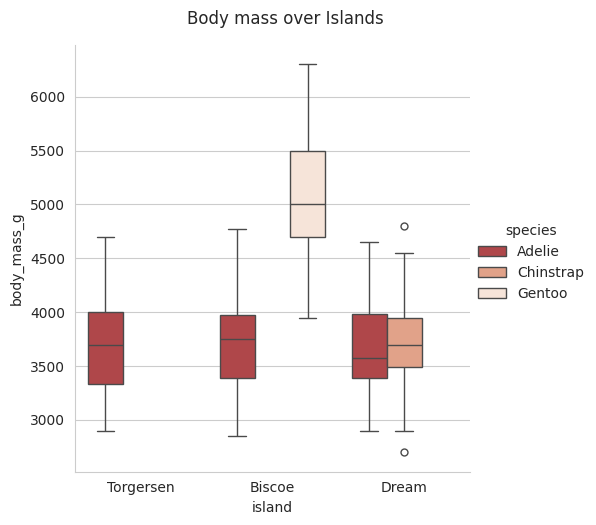

In [50]:
fig=plt.figure(figsize=(4,4))
sns.set_palette('RdBu')
sns.set_style('whitegrid')
g=sns.catplot(data=df1,kind='box',x='island',y='body_mass_g',hue='species')
g.fig.suptitle('Body mass over Islands',y=1.04)
warnings.filterwarnings("ignore", category=UserWarning)
plt.show()

So amongst all the species 'Gentoo' have higest Body mass